In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
cd ..

/Users/yeehonglow/Documents/Imperial/Machine-Learning-to-Track-Cloud-Computing


## Autocorrelation Main Analysis
This notebook aims to perform detailed autocorrelation analysis on the given timeseries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
from random import randrange
import matplotlib.pyplot as plt


random.seed(1)
x_axis = np.arange(0, 29-1/288, 1/288).tolist()
np_cpu = np.load("dataset//google-cpu-full.npy")

# full_cpu is a list of pandas series of the cpu utilisation of all machines
# just a lazy way of converting nd-arrays to pd-series
full_cpu = []
for x in range (0,len(np_cpu)):
    full_cpu.append(pd.Series(np_cpu[x], index = x_axis))  

In [4]:
random_samples = [34, 150, 352, 365, 416, 464, 475, 501, 565, 1033, 1416, 1537, 1638, 1674, 1768, 1931, 1980, 2201, 
                  2682, 2834, 3045, 3110, 3439, 3548, 3584, 3632, 3748, 3782, 3818, 3977, 4179, 4363, 4655, 4747, 
                  4856, 4970, 5200, 5450, 5663, 6014, 6070, 6139, 6219, 6245, 6386, 6443, 6444, 6623, 6788, 6818, 
                  6915, 7090, 7174, 7191, 7297, 7364, 7530, 7737, 7868, 7993, 8023, 8117, 8123, 8181, 8205, 8278, 
                  8318, 8330, 8535, 8644, 8870, 8991, 9058, 9116, 9325, 9626, 9650, 9685, 9952, 10311, 10523, 10642,
                  10675, 10875, 10891, 10982, 11050, 11089, 11247, 11400, 11518, 11652, 11820, 11821, 11856, 11892,
                  12094, 12175, 12185, 12467]

# Full Autocorrelation

In [29]:
# we first look at the autocorrelation of of some machines to see if the machines exhibit periodicity

def plot_autocorrelation(index_list, x_axis = "days", limit = None):
    
    if limit == None:
        limit = len(full_cpu[index_list[0]].to_list())
        
    if x_axis == "days":
        x_axis_label = "Days"
        x_axis = np.arange(0, 29-1/288, 1/288).tolist()
    elif x_axis == "samples":
        x_axis_label = "Samples"
        x_axis = np.arange(0, len(index_list)).tolist()
    
    for index in index_list:
        
        # computing the autocorrelation
        autocorrelation = [full_cpu[index].autocorr(n) for n in range(limit)]
        
        # plotting 
        plt.figure(figsize=(15,5))
        plt.plot(x_axis[0:len(autocorrelation)], autocorrelation, color = 'blue')  
        plt.title("Autocorrelation, Machine " + str(index), fontsize = 18)  
        plt.xlabel(x_axis_label, fontsize = 15)  
        plt.ylabel("Autocorrelation Coefficient", fontsize = 15)  
        plt.minorticks_on()
        plt.grid(which='major', linestyle='-', linewidth='0.5', color='red')
        plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
#         plt.savefig("Autocorrelation, Machine", str(index))
        plt.show()

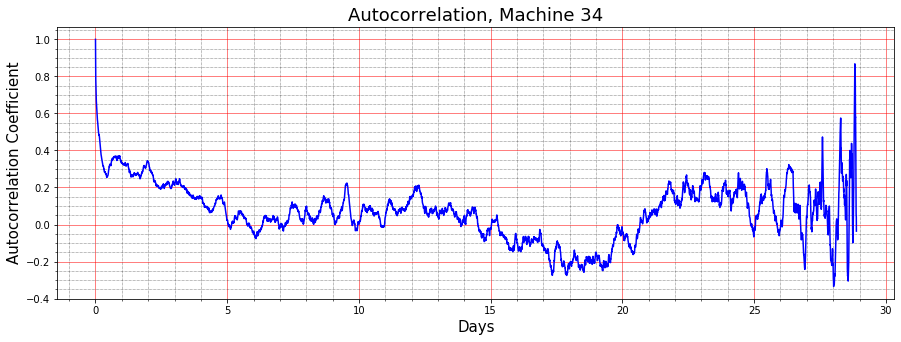

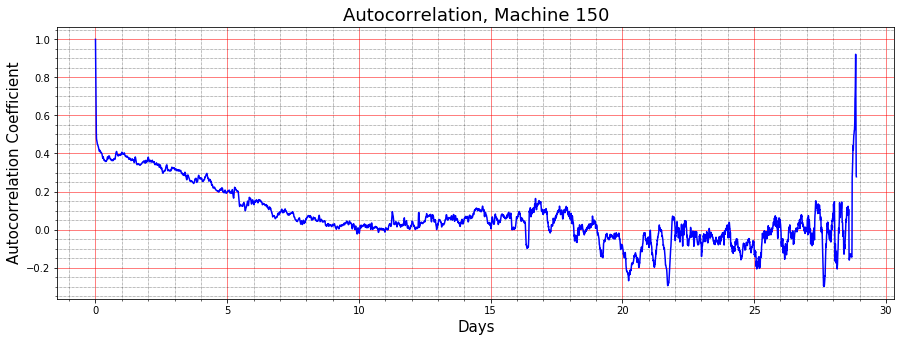

In [30]:
# change the range of random samples to print autocorrelation of different machines

plot_autocorrelation(random_samples[0:2])

## Zoomed Autocorrelation

In [52]:
# since we see that the autocorrelation coefficient is high when the lag is small
# we have a "zoomed in" version of the analysis to have a closer look

hour_index = np.arange(0, 24*30-1/12, 1/12).tolist()

def plot_autocorrelation_1_day(index_list, limit = 50):
    '''plotting the autocorrelation for small values of lag
       index_list: list of machine index to be plotted
       limit: limit of the number of samples to plot   
    '''
    
    for index in index_list:
        autocorrelation = [full_cpu[index].autocorr(n) for n in range(50)]
        plt.figure(figsize=(16,4))
        plt.plot(hour_index[0:limit], autocorrelation[0:limit], color = 'blue', marker = "x")  
        plt.title("Full Autocorrelation, Machine " + str(index), fontsize = 18)  
        plt.xlabel("Lag (Hour)", fontsize = 16)  
        plt.ylabel("Autocorrelation \n Coefficient", fontsize = 16)  
        plt.minorticks_on()
        plt.grid(which='major', linestyle='-', linewidth='0.5', color='red')
        plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
        name = str(index)
        
        plt.savefig("figures//analysis//full_autocorrelation//zoomed_" +name)
        plt.show()

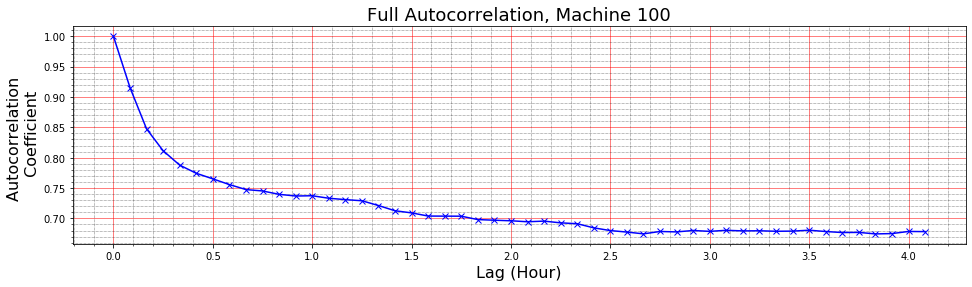

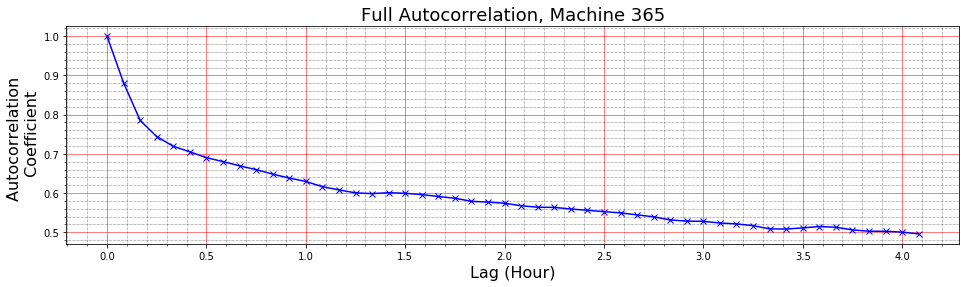

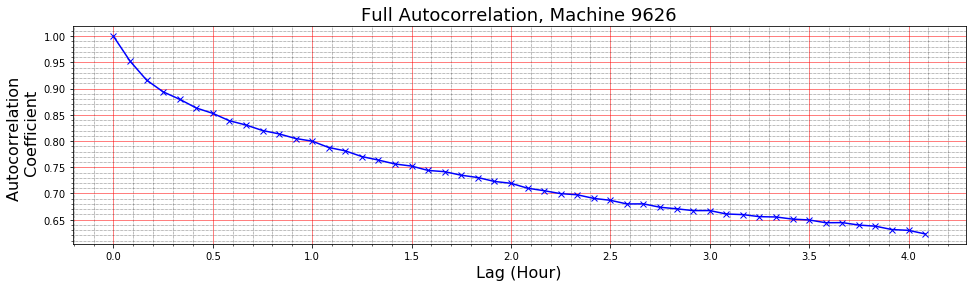

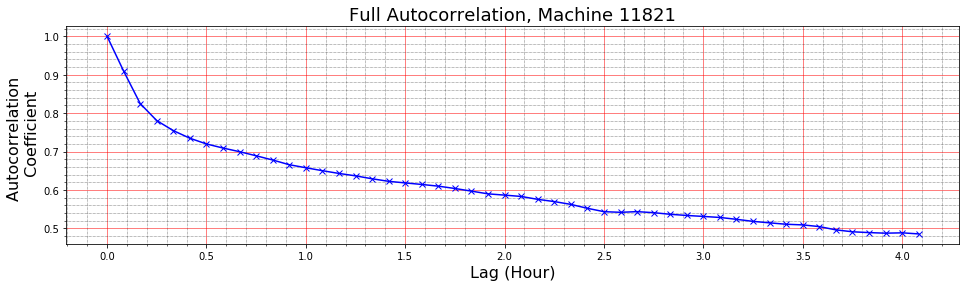

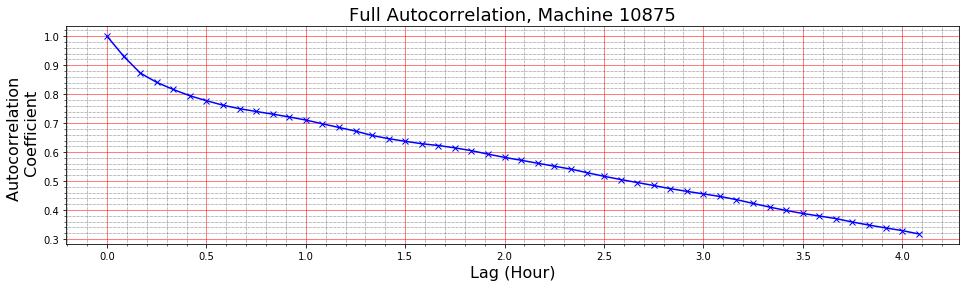

In [53]:
plot_autocorrelation_1_day([100, 365, 9626, 11821,10875], limit = 50)

## Autocorrelation Distribution

In [30]:
# We then look at the distribution of autocorrelation for 100 randomly chosen machines when the lag is small

def all_1_day_autocorrelation(index_list):
    '''calculate the autocorrelation for all machines in index_list for lag from 0 to 288 samples'''
    
    import progressbar
    all_1_day = []
    counter = 0
    
    with progressbar.ProgressBar(max_value = len(index_list)) as bar:
        for index in index_list:
            bar.update(counter)
            autocorrelation = [full_cpu[index].autocorr(n) for n in range(288*2+10)]
            all_1_day.append(autocorrelation)
            counter += 1
        
    return all_1_day    

In [31]:
all_1_day = all_1_day_autocorrelation(random_samples)

100% (100 of 100) |######################| Elapsed Time: 0:00:29 Time:  0:00:29


In [33]:
import progressbar

# separate the data into different time-step to plot the distribution

saparate_by_step = []
temp = []
with progressbar.ProgressBar(max_value = len(all_1_day[0])) as bar:
    for a in range(0,len(all_1_day[0])):
        bar.update(a)
        for b in range(0, len(all_1_day)):
            temp.append(all_1_day[b][a])
            
        saparate_by_step.append(temp) 
        temp = []

100% (586 of 586) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


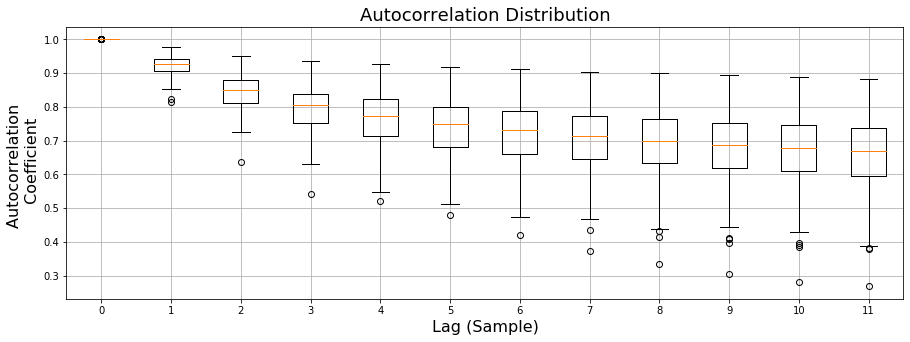

In [54]:
plt.figure(figsize=(15,5))
# plt.title("Correlation between Adjacent Time-step of Machine " + str(index) + " vs Days")  
# plt.xlabel("Days")  
# plt.ylabel("Correlation Coefficient") 
box = plt.boxplot(saparate_by_step[0:12], labels = np.arange(0,12))
plt.grid()
plt.title("Autocorrelation Distribution", fontsize = 18)
plt.ylabel("Autocorrelation \n Coefficient", fontsize = 16)
plt.xlabel("Lag (Sample)", fontsize = 16)
plt.savefig("figures//analysis//full_autocorrelation//autocorrelation_distribution")
plt.show()

# Correlation between Adjacent Days

In [59]:
hour_index = np.arange(0, 24*30-1/12, 1/12).tolist()
x_axis = np.arange(0, 29-1/288, 1/288).tolist()

def interval_autocorrelation(timeseries, window, difference, limit):
    timeseries = timeseries.to_list()
    autocorrelation = []
    for lag in range (0,limit):
        df = pd.DataFrame({0: (timeseries[lag:lag+window]), 1: (timeseries[lag+difference:difference+lag+window])})
        autocorrelation.append(df.corr()[0][1])
        
    return autocorrelation    

def plot_day_autocorrelation(index_list, window, difference, limit):
    '''plotting the correlation between adjacent days'''
    
    for index in index_list:
        autocorrelation = interval_autocorrelation(full_cpu[index], window = window, difference = difference, limit = limit)
        plt.figure(figsize=(16,4))
        plt.plot(x_axis[0:len(autocorrelation)], autocorrelation, color = 'blue')   
        plt.title("Correlation between adjacent days, Machine " + str(index), fontsize = 18)  
        plt.xlabel("Shift (Day)", fontsize = 15)  
        plt.xlim(-1.4,30.4)  
        plt.ylabel("Correlation Coefficient", fontsize = 15)  
        plt.minorticks_on()
        plt.grid(which='major', linestyle='-', linewidth='0.5', color='red')
        plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
        plt.savefig("figures//analysis//adjacent_days//dot_day_autocorrelation_"+str(index))
        plt.show()

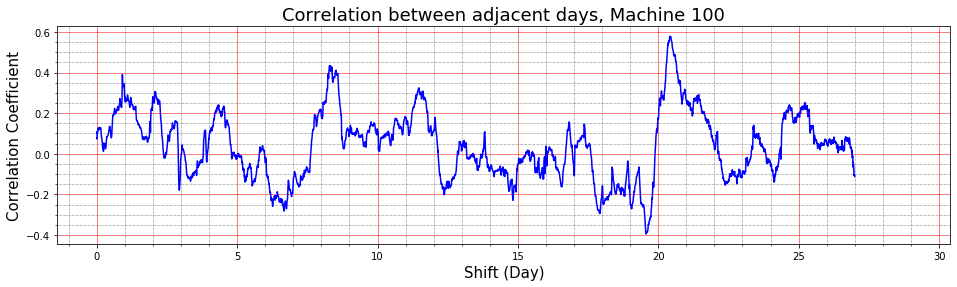

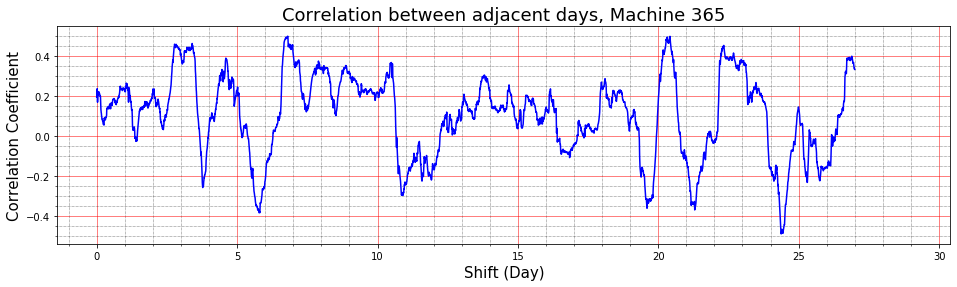

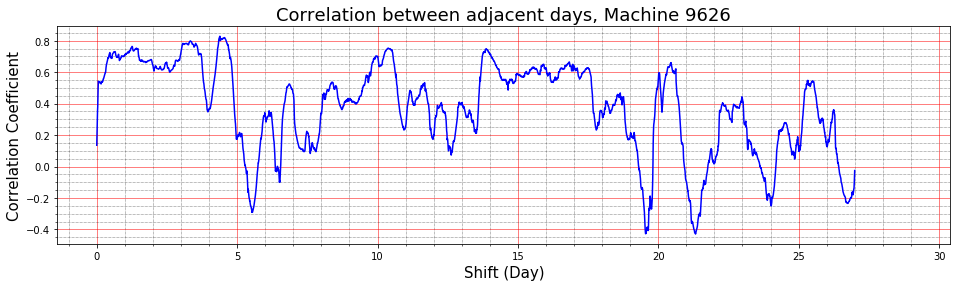

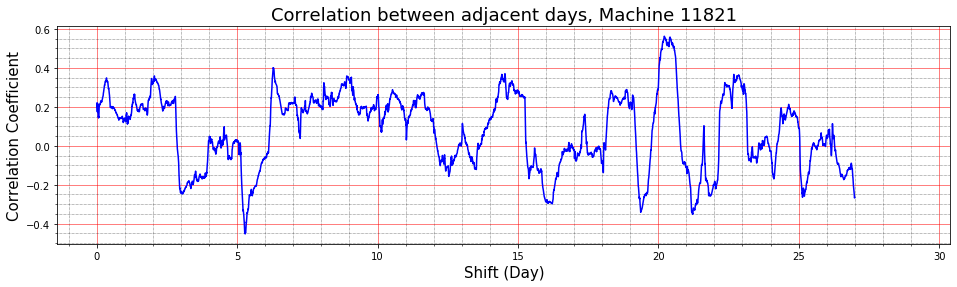

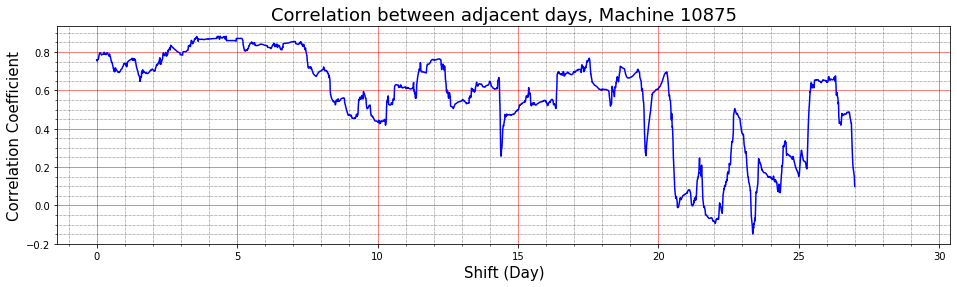

In [62]:
plot_day_autocorrelation([100, 365, 9626, 11821,10875], window = 288, difference = 288, limit = 288*27)

# Correlation between Adjacent Time-step

In [37]:
# we look at the correlation between 

def autocorrelation_with_one_timestep(timeseries, window):
    correlation_ls = []
    timeseries = timeseries.to_list()
    
    for shift in range (0, (len(timeseries) - window - 1)):
        df = pd.DataFrame({0: (timeseries[shift:window+shift]), 1: (timeseries[shift+1:window+shift+1])})
        correlation_ls.append(df.corr()[0][1])
        
    return correlation_ls    

def plot_all_window(index_list):
    '''
    Plotting the correlation between adjacent time-step with windows: 1 day, 12 hours, 6 hours
    index_list -- list of index of machines to plot
    return void
    '''
    
    for index in index_list:
        full_autocorrelation = [full_cpu[index].autocorr(n) for n in range(len(full_cpu[index]))]
        one_day = autocorrelation_with_one_timestep(full_cpu[index], window = 288)
        one_hour = autocorrelation_with_one_timestep(full_cpu[index], window = 12)
        plt.figure(figsize=(15,5))
        plt.title("Correlation between Adjacent Time-step, Machine " + str(index))  
        plt.xlabel("Days")  
        plt.ylabel("Correlation Coefficient") 
        
        plt.plot(x_axis[0:7*288], full_autocorrelation[0:7*288], color = 'blue', label = "Full Length")  
        plt.plot(x_axis[0:7*288], one_day[0:7*288], color = "red", label = "1 Day")
        plt.plot(x_axis[0:7*288], one_hour[0:7*288], color = "green", label = "1 Hour")
        
        plt.legend()
        plt.minorticks_on()
        plt.grid(which='major', linestyle='-', linewidth='0.5', color='red')
        plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
        plt.show()

In [38]:
def plot_all_window_2(index_list):
    '''
    Plotting the correlation between adjacent time-step with windows: full length, 1 day, 1 hour
    index_list -- list of index of machines to plot
    return void
    '''
    
    for index in index_list:
        full_autocorrelation = autocorrelation_with_one_timestep(full_cpu[index], window = 72)
        one_day = autocorrelation_with_one_timestep(full_cpu[index], window = 288)
        half_hour = autocorrelation_with_one_timestep(full_cpu[index], window = 144)
        plt.figure(figsize=(15,5))
        plt.title("Correlation between Adjacent Time-step, Machine " + str(index), fontsize = 18)  
        plt.xlabel("Shift (Day)", fontsize = 15)  
        plt.ylabel("Correlation Coefficient", fontsize = 15) 
         
        plt.plot(x_axis[0:4*288], one_day[0:4*288], color = "red", label = "1 Day")
        plt.plot(x_axis[0:4*288], half_hour[0:4*288], color = "green", label = "12 Hours")
        plt.plot(x_axis[0:4*288], full_autocorrelation[0:4*288], color = 'blue', label = "6 Hours") 
        
        plt.legend(loc = 3, fontsize = 15)
        plt.minorticks_on()
        plt.grid(which='major', linestyle='-', linewidth='0.5', color='red')
        plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
#         plt.savefig("figures//analysis//adjacent//plot_all_" + str(index))
        plt.show()

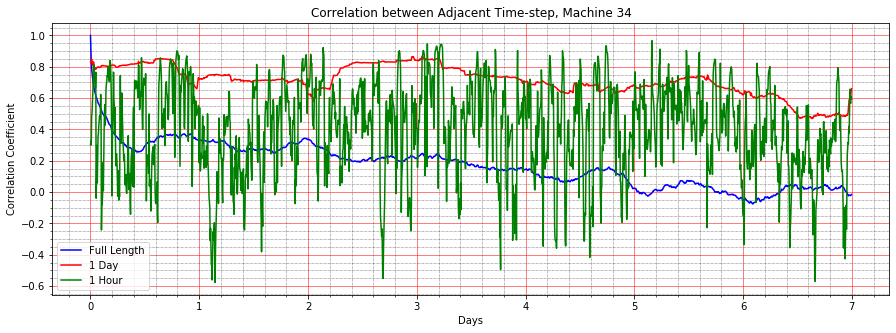

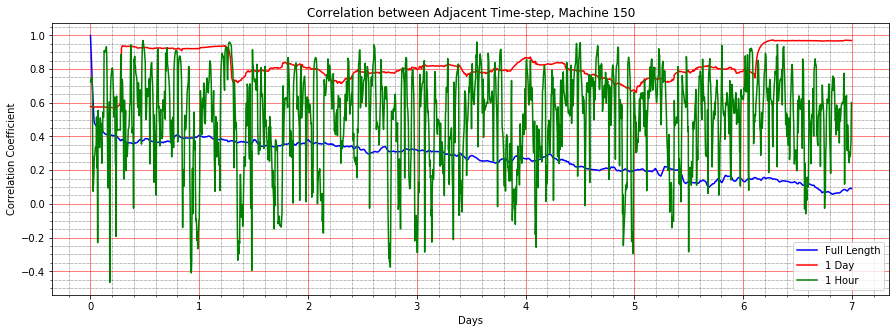

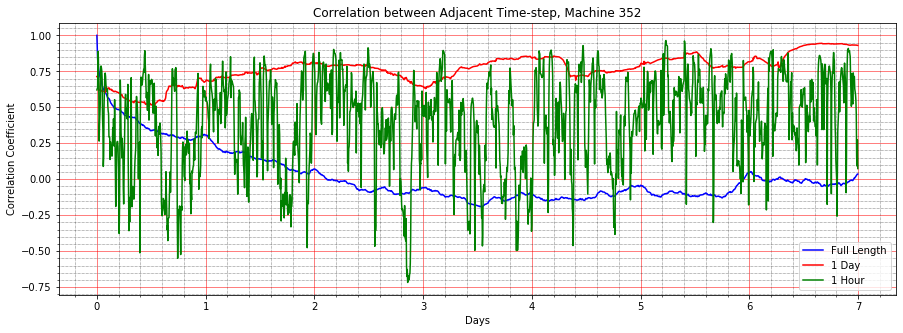

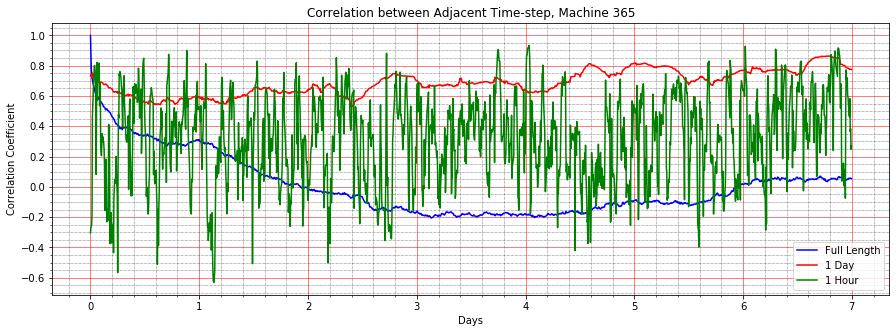

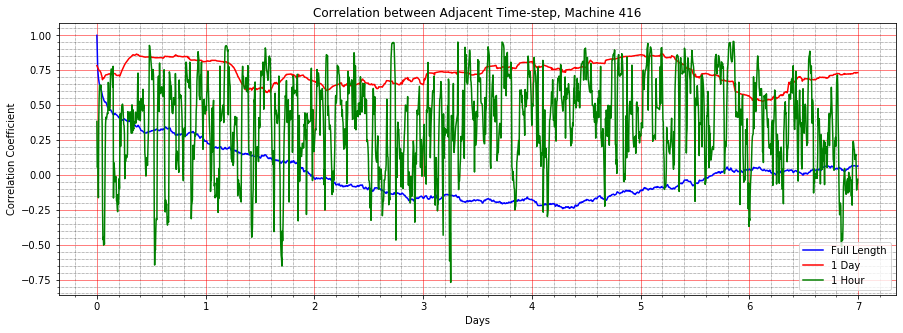

In [39]:
plot_all_window(random_samples[0:5])

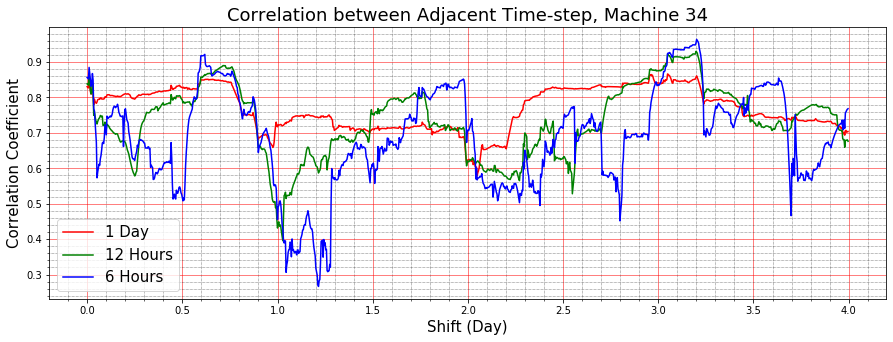

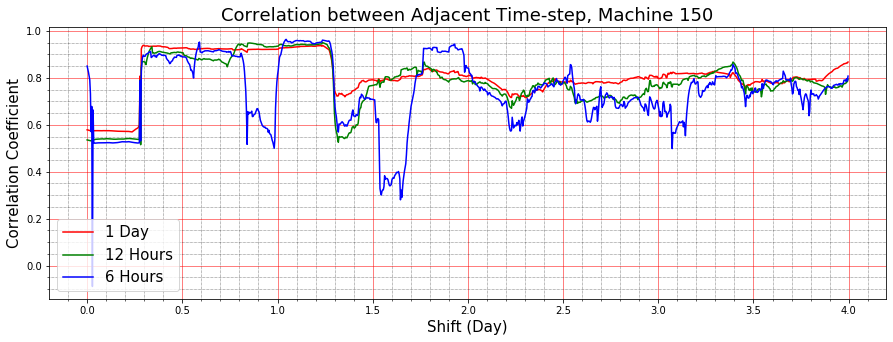

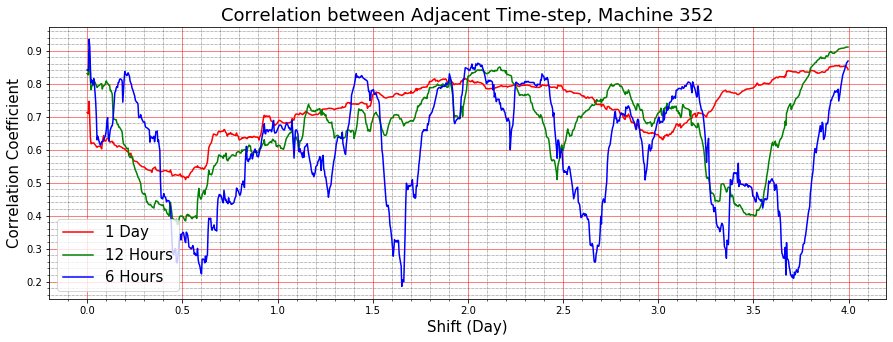

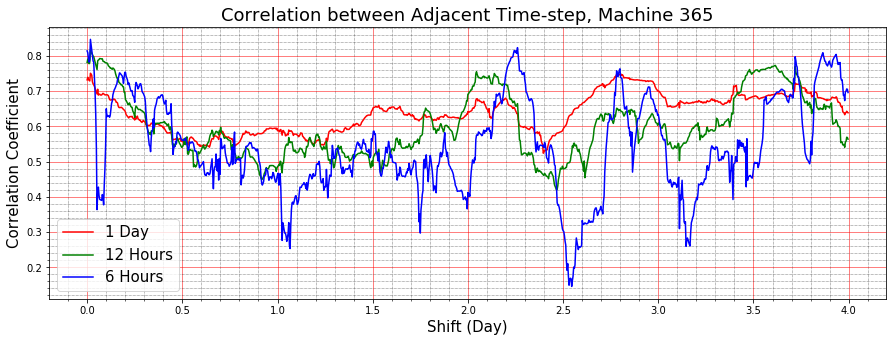

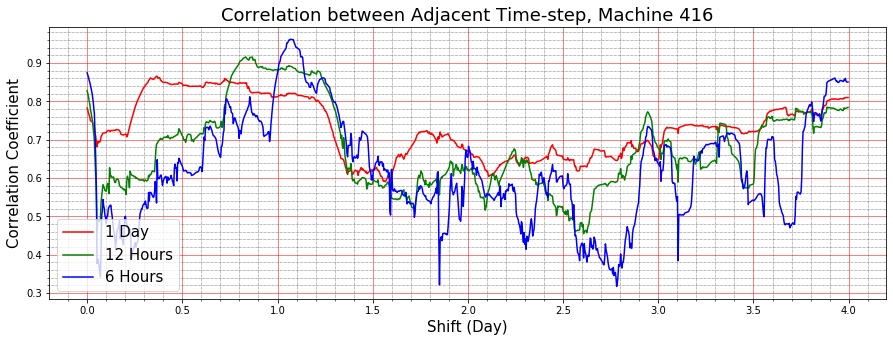

In [41]:
plot_all_window_2(random_samples[0:5])